# Neural Networks image recognition - ConvNet

1. Add random noise (see below on `size parameter` on [`np.random.normal`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html)) to the images in training and testing. **Make sure each image gets a different noise feature added to it. Inspect by printing out several images. Note - the `size` parameter should match the data. **
2. Compare the `accuracy` of train and val after N epochs for MLNN with and without noise. 
3. Vary the amount of noise by changing the `scale` parameter in `np.random.normal` by a factor. Use `.1, .5, 1.0, 2.0, 4.0` for the `scale` and keep track of the `accuracy` for training and validation and plot these results.
4. Compare these results with the previous week where we used a MultiLayer Perceptron (this week we use a ConvNet). 

# Neural Networks - Image Recognition 

In [17]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.optimizers import RMSprop
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend

## Conv Net
Trains a simple convnet on the MNIST dataset.
Gets to 99.25% test accuracy after 12 epochs
(there is still a lot of margin for parameter tuning).


In [18]:
# input image dimensions
img_rows, img_cols = 28, 28

# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if backend.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [19]:
batch_size = 128
num_classes = 10
epochs = 12

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/12
469/469 [==============================] - 5s 10ms/step - loss: 2.2815 - accuracy: 0.1361 - val_loss: 2.2468 - val_accuracy: 0.2708
Epoch 2/12
469/469 [==============================] - 4s 9ms/step - loss: 2.2264 - accuracy: 0.2369 - val_loss: 2.1790 - val_accuracy: 0.4849
Epoch 3/12
469/469 [==============================] - 4s 9ms/step - loss: 2.1564 - accuracy: 0.3401 - val_loss: 2.0865 - val_accuracy: 0.6044
Epoch 4/12
469/469 [==============================] - 4s 9ms/step - loss: 2.0595 - accuracy: 0.4315 - val_loss: 1.9622 - val_accuracy: 0.6921
Epoch 5/12
469/469 [==============================] - 4s 9ms/step - loss: 1.9310 - accuracy: 0.5052 - val_loss: 1.8007 - val_accuracy: 0.7340
Epoch 6/12
469/469 [==============================] - 4s 9ms/step - loss: 1.7734 - accuracy: 0.5535 - val_loss: 1.6031 - val_accuracy: 0.7634
Epoch 7/12
469/469 [==============================] - 4s 9ms/step - loss: 1.5996 - accuracy: 0.5926 - val_loss: 1.3934 - val_accuracy: 0.7879
Epoch

1. Add random noise (see below on size parameter on np.random.normal) to the images in training and testing. *Make sure each image gets a different noise feature added to it. Inspect by printing out several images. Note - the size parameter should match the data. *

In [26]:
import numpy as np

img_rows, img_cols = 28, 28
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# add noise
noise = np.random.normal(0, 1, x_train.shape)
x_train_noise = x_train + noise

noise = np.random.normal(0, 1, x_test.shape)
x_test_noise = x_test + noise

x_train /= 255
x_test /= 255
x_train_noise /= 255
x_test_noise /= 255

In [21]:
# Compare images before and after adding noise
print(f"x_train[0]:\n{x_train[0]}")
print(f"x_train_noise[0]:\n{x_train_noise[0]}")
print(f"x_test[0]:\n{x_test[0]}")
print(f"x_test_noise[0]:\n{x_test_noise[0]}")

x_train[0]:
[[[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.    

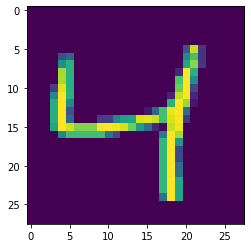

In [22]:
import matplotlib.pyplot as  plt
%matplotlib inline
plt.imshow(x_train[2].reshape(28, 28))

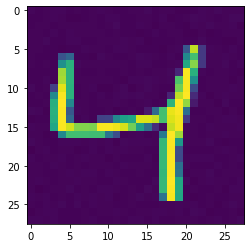

In [23]:
plt.imshow(x_train_noise[2].reshape(28, 28))

2. Compare the `accuracy` of train and val after N epochs for MLNN with and without noise. 

In [27]:
# with same parameters
batch_size = 128
num_classes = 10
epochs = 12


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential(name="model_with_noise")
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.fit(x_train_noise, y_train,
        batch_size=batch_size,
        epochs=epochs,
        verbose=1,
        validation_data=(x_test_noise, y_test))
score_noise = model.evaluate(x_test_noise, y_test, verbose=0)
print('Test loss with adding noise:', score_noise[0])
print('Test accuracy with adding noise:', score_noise[1])
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Model: "model_with_noise"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 conv2d_15 (Conv2D)          (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 12, 12, 64)       0         
 2D)                                                             
                                                                 
 dropout_14 (Dropout)        (None, 12, 12, 64)        0         
                                                                 
 flatten_7 (Flatten)         (None, 9216)              0         
                                                                 
 dense_14 (Dense)            (None, 128)               1179776   
                                                  

3. Vary the amount of noise by changing the `scale` parameter in `np.random.normal` by a factor. Use `.1, .5, 1.0, 2.0, 4.0` for the `scale` and keep track of the `accuracy` for training and validation and plot these results.

In [30]:
scales = [0.1, 0.5, 1.0, 2.0, 4.0]
train_scores = [[0] for _ in range(len(scales))]
validation_scores = [[0] for _ in range(len(scales))]
for i in range(len(scales)):
    # get data
    (x_train, y_train), (x_test, y_test) = mnist.load_data()
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
    x_train = x_train.astype('float32')
    x_test = x_test.astype('float32')

    # add noise
    noise = np.random.normal(0, scales[i], x_train.shape)
    x_train_noise = x_train + noise

    noise = np.random.normal(0, scales[i], x_test.shape)
    x_test_noise = x_test + noise

    x_train /= 255
    x_test /= 255
    x_train_noise /= 255
    x_test_noise /= 255

    # build model
    batch_size = 128
    num_classes = 10
    epochs = 12

    # convert class vectors to binary class matrices
    y_train = keras.utils.to_categorical(y_train, num_classes)
    y_test = keras.utils.to_categorical(y_test, num_classes)

    model = Sequential(name=f"noise_scale_{scales[i]}")
    model.add(Conv2D(32, kernel_size=(3, 3),
                    activation='relu',
                    input_shape=input_shape))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))

    model.summary()

    model.compile(loss=keras.losses.categorical_crossentropy,
                optimizer=keras.optimizers.Adadelta(),
                metrics=['accuracy'])

    history = model.fit(x_train_noise, y_train,
            batch_size=batch_size,
            epochs=epochs,
            verbose=1,
            validation_data=(x_test_noise, y_test))

    train_scores[i] = history.history['accuracy']
    validation_scores[i] = history.history['val_accuracy']
    score_noise = model.evaluate(x_test_noise, y_test, verbose=0)
    print('Test loss with adding noise:', score_noise[0])
    print('Test accuracy with adding noise:', score_noise[1])

Model: "noise_scale_0.1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 conv2d_25 (Conv2D)          (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 12, 12, 64)       0         
 g2D)                                                            
                                                                 
 dropout_24 (Dropout)        (None, 12, 12, 64)        0         
                                                                 
 flatten_12 (Flatten)        (None, 9216)              0         
                                                                 
 dense_24 (Dense)            (None, 128)               1179776   
                                                   

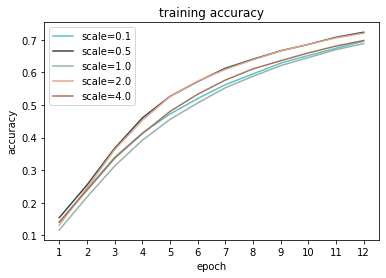

In [31]:
# plot result
colors = ['#5EC2C2', '#324B4B', '#95B1B0', '#E2A589', '#A97157']
for i in range(len(train_scores)):
    score = train_scores[i]
    plt.plot(list(range(1, len(score)+1)), score, color=colors[i], label=f"scale={scales[i]}")
plt.legend()
plt.xlabel("epoch")
plt.xticks(list(range(1, len(score)+1)))
plt.ylabel("accuracy")
plt.title("training accuracy")
plt.show()

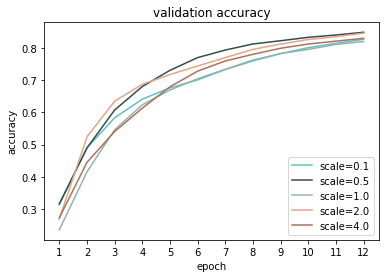

In [32]:
# plot result
colors = ['#5EC2C2', '#324B4B', '#95B1B0', '#E2A589', '#A97157']
for i in range(len(validation_scores)):
    score = validation_scores[i]
    plt.plot(list(range(1, len(score)+1)), score, color=colors[i], label=f"scale={scales[i]}")
plt.legend()
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.xticks(list(range(1, len(score)+1)))
plt.title("validation accuracy")
plt.show()

4. Compare these results with the previous week where we used a MultiLayer Perceptron (this week we use a ConvNet). 

In [34]:
# MLP model, copy the last code here
scales = [0.1, 0.5, 1.0, 2.0, 4.0]
mlp_train_scores = [[0] for _ in range(len(scales))]
mlp_validation_scores = [[0] for _ in range(len(scales))]
for i in range(len(scales)):
    (x_train, y_train), (x_test, y_test) = mnist.load_data()
    x_train = x_train.reshape(60000, 784)
    x_test = x_test.reshape(10000, 784)
    x_train = x_train.astype('float32')
    x_test = x_test.astype('float32')

    # add noise
    noise = np.random.normal(0, scales[i], (60000, 784))
    x_train_noise = x_train + noise

    noise = np.random.normal(0, scales[i], (10000, 784))
    x_test_noise = x_test + noise

    x_train /= 255
    x_test /= 255
    x_train_noise /= 255
    x_test_noise /= 255

    # build model
    batch_size = 128
    num_classes = 10
    epochs = 12   # same with the ConvNet

    # convert class vectors to binary class matrices
    y_train = keras.utils.to_categorical(y_train, num_classes)
    y_test = keras.utils.to_categorical(y_test, num_classes)

    model = Sequential(name=f"mlp_model_noise_scale_{scales[i]}")
    model.add(Dense(512, activation='relu', input_shape=(784,)))
    model.add(Dropout(0.2))
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(10, activation='softmax'))

    model.summary()

    model.compile(loss='categorical_crossentropy',
                optimizer=RMSprop(),
                metrics=['accuracy'])

    history = model.fit(x_train_noise, y_train,
                        batch_size=batch_size,
                        epochs=epochs,
                        verbose=1,
                        validation_data=(x_test_noise, y_test))
    mlp_train_scores[i] = history.history['accuracy']
    mlp_validation_scores[i] = history.history['val_accuracy']
    mlp_score_noise = model.evaluate(x_test_noise, y_test, verbose=0)
    print('Test loss with adding noise:', mlp_score_noise[0])
    print('Test accuracy with adding noise:', mlp_score_noise[1])

Model: "mlp_model_noise_scale_0.1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_37 (Dense)            (None, 512)               401920    
                                                                 
 dropout_36 (Dropout)        (None, 512)               0         
                                                                 
 dense_38 (Dense)            (None, 512)               262656    
                                                                 
 dropout_37 (Dropout)        (None, 512)               0         
                                                                 
 dense_39 (Dense)            (None, 10)                5130      
                                                                 
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________
Epoch 1/12
469/469 [===============

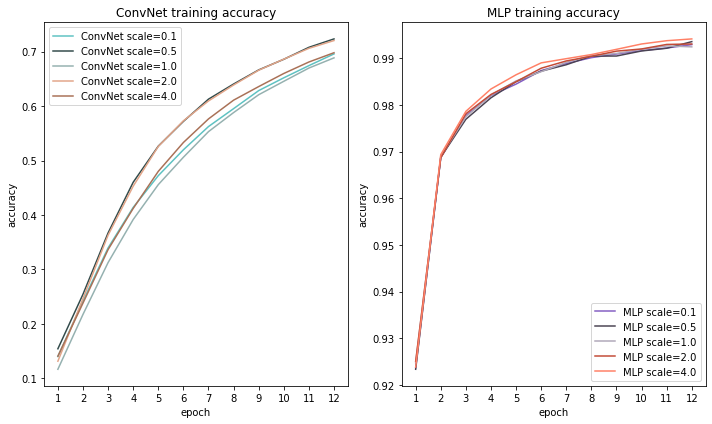

In [51]:
# Compare ConvNet and MLP
conv_colors = ['#5EC2C2', '#324B4B', '#95B1B0', '#E2A589', '#A97157']
mlp_colors = ['#845EC2', '#4B4453', '#B0A8B9', '#C34A36', '#FF8066']
plt.figure(figsize=(10, 6))
plt.subplot(1,2,1)
for i in range(len(train_scores)):
    conv_score = train_scores[i]
    plt.plot(list(range(1, len(conv_score)+1)), conv_score, color=conv_colors[i], label=f"ConvNet scale={scales[i]}")
plt.legend()
plt.xlabel("epoch")
plt.xticks(list(range(1, len(score)+1)))
plt.ylabel("accuracy")
plt.title("ConvNet training accuracy")

plt.subplot(1,2,2)
for i in range(len(mlp_train_scores)):
    mlp_score = mlp_train_scores[i]
    plt.plot(list(range(1, len(mlp_score)+1)), mlp_score, color=mlp_colors[i], label=f"MLP scale={scales[i]}")
plt.legend()
plt.xlabel("epoch")
plt.xticks(list(range(1, len(score)+1)))
plt.ylabel("accuracy")
plt.title("MLP training accuracy")
plt.tight_layout()
plt.show()

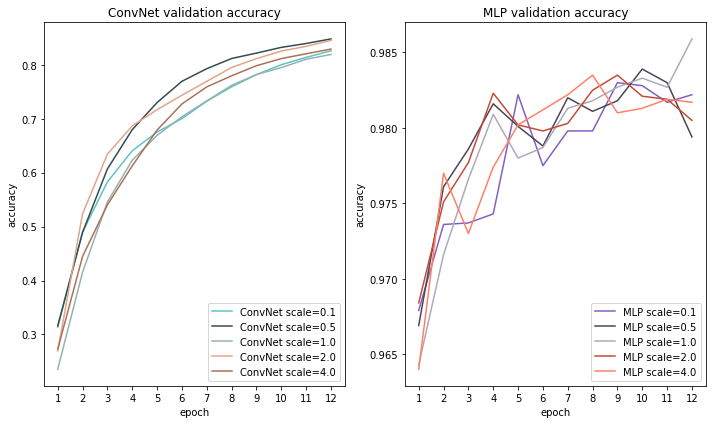

In [52]:
# Compare ConvNet and MLP
conv_colors = ['#5EC2C2', '#324B4B', '#95B1B0', '#E2A589', '#A97157']
mlp_colors = ['#845EC2', '#4B4453', '#B0A8B9', '#C34A36', '#FF8066']
plt.figure(figsize=(10, 6))
plt.subplot(1,2,1)
for i in range(len(validation_scores)):
    conv_score = validation_scores[i]
    plt.plot(list(range(1, len(conv_score)+1)), conv_score, color=conv_colors[i], label=f"ConvNet scale={scales[i]}")
plt.legend()
plt.xlabel("epoch")
plt.xticks(list(range(1, len(score)+1)))
plt.ylabel("accuracy")
plt.title("ConvNet validation accuracy")

plt.subplot(1,2,2)
for i in range(len(mlp_validation_scores)):
    mlp_score = mlp_validation_scores[i]
    plt.plot(list(range(1, len(mlp_score)+1)), mlp_score, color=mlp_colors[i], label=f"MLP scale={scales[i]}")
plt.legend()
plt.xlabel("epoch")
plt.xticks(list(range(1, len(score)+1)))
plt.ylabel("accuracy")
plt.title("MLP validation accuracy")
plt.tight_layout()
plt.show()